# Order parameters 
## Parity order parameter 

\begin{equation} 
\mathscr{O}_P = \lim_{|i-j| \to \infty} \langle  e^{i\theta \sum_{i \le k < j} \delta \hat{n}_k}\rangle
\end{equation}

## String Order Parameter 
\begin{equation} 
\mathscr{O}_S = \lim_{|i-j| \to \infty} \langle \delta \hat{n}_i e^{i\theta \sum_{i \le k < j} \delta \hat{n}_k} \delta \hat{n}_j \rangle
\end{equation}

In [136]:
using LinearAlgebra #Eigenvalues and Eigenvectors, matrices... 
using Plots #Graph
using SparseArrays #Sparse matrices 
using LaTeXStrings #Titles and labels  
using OrderedCollections #give the values of coefficients without repeatition
using JLD #Save data 
#definition of N,M,D
global N=7
global M=7
global D=Int((factorial(M+N-1))/(factorial(M-1)*factorial(N)))  

#i-prime number function(suggested form) 
p(i)=100i+3 

#Generate a basis for N = M
function generate_basis(N, M)
    D = prod(max(N, M):N+M-1) ÷ prod(1:min(N, M))
    basis = [zeros(Int, M) for _ in 1:D]
    basis[1][1] = N
    for t = 2:D
        if basis[t-1][M] != 0
            k = M - 1
        else
            k = M
        end
        while k > 0 && basis[t-1][k] == 0
            k -= 1
        end
        @views basis[t][1:k-1] .= basis[t-1][1:k-1] 
        basis[t][k] = basis[t-1][k] - 1
        basis[t][k+1] = N - sum(@view(basis[t][1:k])) 
        end 
    return basis  
end 
v=generate_basis(N,M);

In [137]:
###Restriction for 2 particles per site
i = D
while i != 0  
    for k in 1:M
        if(v[i][k] > 2)  
            deleteat!(v , i)  
            i = length(v)
        end    
    end 
    i-=1
end   
#Changing the dimension
D = length(v) 
#Checking 
v

393-element Vector{Vector{Int64}}:
 [2, 2, 2, 1, 0, 0, 0]
 [2, 2, 2, 0, 1, 0, 0]
 [2, 2, 2, 0, 0, 1, 0]
 [2, 2, 2, 0, 0, 0, 1]
 [2, 2, 1, 2, 0, 0, 0]
 [2, 2, 1, 1, 1, 0, 0]
 [2, 2, 1, 1, 0, 1, 0]
 [2, 2, 1, 1, 0, 0, 1]
 [2, 2, 1, 0, 2, 0, 0]
 [2, 2, 1, 0, 1, 1, 0]
 [2, 2, 1, 0, 1, 0, 1]
 [2, 2, 1, 0, 0, 2, 0]
 [2, 2, 1, 0, 0, 1, 1]
 ⋮
 [0, 0, 1, 2, 2, 0, 2]
 [0, 0, 1, 2, 1, 2, 1]
 [0, 0, 1, 2, 1, 1, 2]
 [0, 0, 1, 2, 0, 2, 2]
 [0, 0, 1, 1, 2, 2, 1]
 [0, 0, 1, 1, 2, 1, 2]
 [0, 0, 1, 1, 1, 2, 2]
 [0, 0, 1, 0, 2, 2, 2]
 [0, 0, 0, 2, 2, 2, 1]
 [0, 0, 0, 2, 2, 1, 2]
 [0, 0, 0, 2, 1, 2, 2]
 [0, 0, 0, 1, 2, 2, 2]

In [3]:
# ##simply exercise for fill 2 per site, for a given vector !Not order
# vec = [0,0,0,0] 
# Me = 3

# for i in 1:length(vec)
#     vec[i] = Me  
#     if  vec[i] == 1 
#         break 
#     end
#     if vec[i] >= 2 
#         vec[i] = 2  
#         Me-=2 
#     end   
#     if Me == 0 
#         break 
#     end
# end 
# vec 

In [4]:
function occupation(i, v) 
     if(v[i] >= 1)  
        return  v[i]  
    else 
        return 0;
    end  
end 

occupation (generic function with 1 method)

In [5]:
function matrixoccupation(k, D) 
    mat = spzeros(D,D)
    for j in 1:D 
        mat[j,j] = occupation(k, v[j]) 
    end   
    return mat 
end

matrixoccupation (generic function with 1 method)

In [5]:
Matrix(sum(matrixoccupation(i,D) for i in 1:(N-1))) - (N-1)*I == matrixoccupation(1, D) + matrixoccupation(2, D)  - 2*I #matrixoccupation(4, D) - 4*I

false

In [6]:
exp(1im*pi*Matrix((matrixoccupation(1, D) + matrixoccupation(2, D) - 2*I ))) #matrixoccupation(3, D) + matrixoccupation(4, D) - 4*I)))

393×393 Matrix{ComplexF64}:
 1.0-4.70255e-16im  0.0+0.0im          …  0.0+0.0im
 0.0+0.0im          1.0-4.70255e-16im     0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          …  0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          …  0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
    ⋮                                  ⋱  
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im             0.0+0.0im
 0.0+0.0im          0.0+0.0im          …  0.0

In [6]:
#Parity order parameter 
theta = pi
Op = exp(Matrix(sum(1im*theta*matrixoccupation(i,D) for i in 1:(N-1))) - 1im*theta*(N-1)*I)
Op = real(Op);

In [7]:
#String Order parameter (we fix the parameters i =1, j = N, and i<=k<j ) 
Ots = (exp(Matrix(sum(1im*theta*matrixoccupation(i,D) for i in 1:(N-1))) - 1im*theta*(N-1)*I))*(Matrix(matrixoccupation(N,D)) - I)
Os = (Matrix(matrixoccupation(1,D)) - I)*Ots 
Os = real(Os);

In [8]:
#Optim Example for 
#f(x) = (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2  
#x0 = [0.0, 0.0]  
#optimize(f, x0)  
# optimize(f, zeros(2) )  
##optimize(x->dot(x, Os*x), zeros(D)) ###NO CONSTRAINTS! so we will use JuMP package 
using JuMP
import Ipopt

In [21]:
function ParityOrder(; verbose = true)
    model = Model(Ipopt.Optimizer)
    set_silent(model)
    @variable(model, z)
    @variable(model, x[1:D] >= 0)
    @objective(model, Min, z)  
    @constraint(model, dot(x, Op*x) == z)
    @constraint(model, sum(x.^2) == 1)
    optimize!(model)
    if verbose
        print(model)
        println("Objective value: ", objective_value(model))
        println("Op = ", value(z))
        for i in 1:D 
            println("x_$i = ", value(x[i]) ) 
        end
    end
    return
end

#ParityOrder()

ParityOrder (generic function with 1 method)

In [15]:
function StringOrder(; verbose = true)
    model = Model(Ipopt.Optimizer)
    set_silent(model)
    @variable(model, z)
    @variable(model, 0 <= x[1:D] <= 1 )
    @objective(model, Max, z)   
    @constraint(model, dot(x,Op*x) == 0)
    @constraint(model, dot(x, Os*x) == z)
    @constraint(model, sum(x.^2) == 1)
    optimize!(model)
    if verbose
        print(model)
        println("Objective value: ", objective_value(model))
        println("Os = ", value(z))
        for i in 1:D 
            println("x_$i = ", value(x[i]) ) 
        end
    end
    return
end

#StringOrder() 
#println("square root of the probability amplitude ")

StringOrder (generic function with 1 method)

In [388]:
##For 4 sites 4 particles
coefficients = Vector{Float64}()
function StringOrder(; verbose = true)
    model = Model(Ipopt.Optimizer)
    set_silent(model)
    @variable(model, z)
    @variable(model, 0 <= x[1:D] <= 1 )
    @objective(model, Max, z)   
    @constraint(model, sum(Op*x) == 0)
    @constraint(model, sum(Os*x) == z)
    @constraint(model, sum(x) == 1)
    optimize!(model)
    if verbose
        #print(model)
        #println("Objective value: ", objective_value(model)) 
        #L"Objective~value:"
        println("Os = ", value(z))
        for i in 1:D 
            #println("x_$i = ", value(x[i]) )  
            push!(coefficients, value(x[i]))
        end
    end
    return
end

StringOrder()
DictOfBasis = Dict(coefficients .=> v) 
println("The largest probability amplitude is ", maximum(coefficients) ," corresponding to the basis vector " , 
DictOfBasis[maximum(coefficients)] )


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Os = 0.5000000647645655
The largest probability amplitude is 0.08333334121492098 corresponding to the basis vector [0, 1, 1, 2]


In [138]:
##For 7 sites 7 particles
coefficients = Vector{Float64}()
function StringOrder(; verbose = true)
    model = Model(Ipopt.Optimizer)
    set_silent(model)
    @variable(model, z)
    @variable(model, 0 <= x[1:D] <= 1 )
    @objective(model, Max, z)   
    @constraint(model, sum(Op*x) == 0)
    @constraint(model, sum(Os*x) == z)
    @constraint(model, sum(x) == 1)
    optimize!(model)
    if verbose
        #print(model)
        #println("Objective value: ", objective_value(model)) 
        #L"Objective~value:"
        println("Os = ", value(z))
        for i in 1:D 
            #println("x_$i = ", value(x[i]) )  
            push!(coefficients, value(x[i]))
        end
    end
    return
end

StringOrder()
DictOfBasis = Dict(coefficients .=> v)  

println("The largest probability amplitude is ", maximum(coefficients) ," corresponding to the basis vector " , 
DictOfBasis[maximum(coefficients)] )

Os = 0.50000164098555
The largest probability amplitude is 0.004901971829046594 corresponding to the basis vector [0, 0, 0, 2, 1, 2, 2]


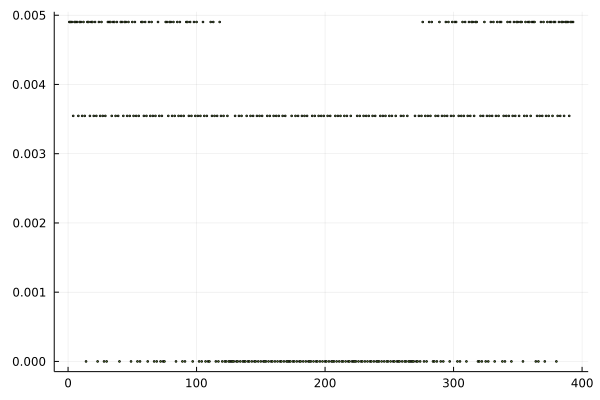

In [149]:
#rounding  
coefsrounded = round.(coefficients, digits=6) 
DictOfBasis2 = Dict(v .=> coefsrounded)  
##
##
x = 1:D
scatter(x, coefsrounded, ms = 1, primary = false)

In [141]:
has(x::AbstractFloat, y) = x == y
has(x::AbstractVector , y) = any(has(i, y) for i in x) 

has (generic function with 5 methods)

In [177]:
#Useless for different cases!
# C1 = Vector{Vector{Int8}}()
# C2 = Vector{Vector{Int8}}()
# C3 = Vector{Vector{Int8}}()

# for i in 1:D
#     if (DictOfBasis2[v[i]] == 0.004902) 
#         push!(C1, v[i]) 
#     elseif (...) 
#
# end 

#A better approach!
#Simple example/exercise
#d = Dict( [0,2,3] => 1.5, [1,2,3] => 2.5 , [2,4,5] => 1.5)  
#has(x::AbstractFloat, y) = x == y
#has(x::AbstractVector , y) = any(has(i, y) for i in x) 
#kiki = [k for (k,v) in d if has(v, 1.5)]

In [170]:
#what are the basis vectors for different coefficients?   
#key_values = Vector{Vector{Vector{Int8}}}()
#for i in eachindex(OrderedSet(coefsrounded))   

#you got an probability amplitude of OrderedSet(coefsrounded)[1] in the next vectors: 
key_value = [k for (k,v) in DictOfBasis2 if has(v, OrderedSet(coefsrounded)[1] )];
#key_value2 = [k for (k,v) in DictOfBasis2 if has(v, OrderedSet(coefsrounded)[2] )]  
#key_value3 = [k for (k,v) in DictOfBasis2 if has(v, OrderedSet(coefsrounded)[3] )]   

#    push!(key_values[i], key_value)
#end

In [178]:
#key_values = Vector{Vector{Vector{Int8}}}[] 
key_values = [] 
OSC = OrderedSet(coefsrounded)
for i in eachindex(OSC)  
    push!(key_values, [k for (k,v) in DictOfBasis2 if has(v, OSC[i] )] ) 
end

In [179]:
for i in eachindex(OrderedSet(coefsrounded))  
    println("We got an probability amplitude of ", OSC[i]," in the next vectors: ", key_values[i] )  
end

We got an probability amplitude of 0.004902 in the next vectors: [[0, 0, 1, 1, 1, 2, 2], [2, 2, 0, 1, 0, 2, 0], [0, 1, 1, 1, 1, 1, 2], [2, 0, 1, 2, 1, 1, 0], [0, 2, 2, 0, 1, 0, 2], [0, 1, 0, 2, 0, 2, 2], [0, 1, 0, 2, 1, 1, 2], [0, 0, 2, 2, 1, 0, 2], [0, 1, 2, 1, 1, 0, 2], [0, 2, 1, 1, 0, 1, 2], [2, 2, 2, 1, 0, 0, 0], [2, 1, 1, 1, 2, 0, 0], [2, 1, 1, 0, 2, 1, 0], [2, 2, 1, 0, 0, 2, 0], [0, 2, 1, 0, 1, 1, 2], [2, 1, 0, 2, 2, 0, 0], [2, 0, 2, 1, 0, 2, 0], [0, 1, 1, 2, 1, 0, 2], [2, 2, 0, 1, 1, 1, 0], [2, 0, 1, 2, 0, 2, 0], [0, 1, 2, 0, 2, 0, 2], [2, 2, 1, 1, 1, 0, 0], [2, 1, 1, 1, 1, 1, 0], [2, 2, 1, 2, 0, 0, 0], [2, 0, 1, 1, 1, 2, 0], [2, 0, 2, 0, 1, 2, 0], [0, 1, 1, 2, 0, 1, 2], [2, 0, 2, 1, 1, 1, 0], [0, 0, 0, 2, 1, 2, 2], [2, 2, 0, 2, 1, 0, 0], [0, 2, 2, 0, 0, 1, 2], [0, 0, 0, 2, 2, 1, 2], [2, 0, 0, 2, 1, 2, 0], [0, 1, 0, 0, 2, 2, 2], [0, 0, 1, 2, 0, 2, 2], [2, 2, 0, 1, 2, 0, 0], [2, 0, 2, 2, 0, 1, 0], [0, 0, 2, 2, 0, 1, 2], [2, 2, 1, 0, 1, 1, 0], [0, 2, 0, 2, 0, 1, 2], [0, 1, 0, 1, 1

We got an probability amplitude of -0.0 in the next vectors: [[0, 2, 1, 1, 1, 2, 0], [1, 0, 1, 2, 2, 1, 0], [1, 1, 0, 2, 2, 1, 0], [1, 1, 1, 0, 1, 1, 2], [1, 0, 0, 2, 0, 2, 2], [0, 2, 2, 1, 0, 2, 0], [1, 0, 1, 0, 2, 1, 2], [1, 0, 0, 1, 1, 2, 2], [2, 0, 0, 2, 1, 0, 2], [2, 0, 0, 1, 0, 2, 2], [1, 2, 1, 0, 0, 1, 2], [2, 0, 0, 1, 2, 0, 2], [1, 1, 0, 0, 1, 2, 2], [1, 2, 1, 2, 1, 0, 0], [1, 2, 0, 2, 0, 2, 0], [1, 2, 1, 1, 0, 2, 0], [2, 0, 2, 0, 0, 1, 2], [0, 1, 1, 1, 2, 2, 0], [2, 1, 0, 1, 0, 1, 2], [0, 1, 2, 1, 2, 1, 0], [0, 2, 2, 1, 1, 1, 0], [1, 0, 1, 1, 0, 2, 2], [2, 0, 0, 2, 0, 1, 2], [1, 1, 2, 0, 2, 1, 0], [1, 2, 1, 0, 1, 2, 0], [1, 1, 1, 0, 2, 0, 2], [1, 0, 1, 1, 2, 0, 2], [1, 0, 0, 2, 2, 0, 2], [1, 2, 1, 0, 1, 0, 2], [0, 1, 2, 2, 0, 2, 0], [1, 2, 1, 1, 1, 1, 0], [2, 1, 2, 0, 0, 0, 2], [0, 0, 2, 2, 2, 1, 0], [0, 1, 2, 0, 2, 2, 0], [0, 2, 1, 2, 2, 0, 0], [2, 1, 0, 0, 2, 0, 2], [2, 0, 2, 0, 1, 0, 2], [2, 1, 0, 1, 1, 0, 2], [1, 1, 2, 2, 0, 1, 0], [0, 2, 2, 0, 1, 2, 0], [2, 2, 0, 0, 1, 0,

In [196]:
#Graph
parts = []
for i in eachindex(OSC)
    push!(parts, length(key_values[i])) 
end
#end 
#parts[1]

102

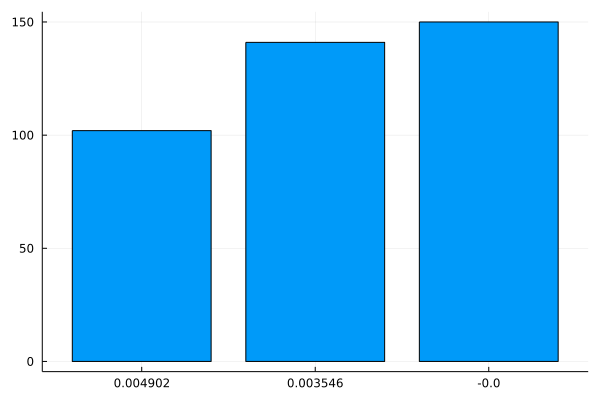

In [230]:
labels = string.(OSC)
bar( labels, parts , legend = false)  